## PRÁTICA INDEPENDENTE: Scikit_Learn_Stats_Models - Solução.


### Exercícios

Recriar os modelos estudados na prática guiada sobre Scikit Learn - Stats Models que usaram `scikit learn` com `statsmodels`:

    1 - usando LSTAT;
    2 - usando RM e LSTAT;
    3 - usando todas as variáveis.

Comparem os gráficos e os EMC.

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
data = datasets.load_boston()
#print (data.DESCR)
#data = datasets.load_boston(return_X_y = True)
#print (data)

In [7]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns = data.feature_names)
targets = pd.DataFrame(data.target, columns = ["MEDV"])
print (df.head())
print (targets.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


#### Exercício 1: Usando `'LSTAT'`.

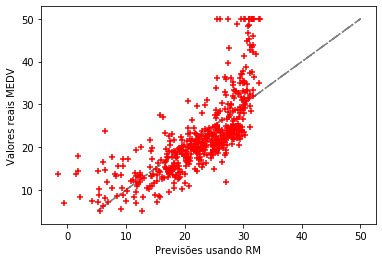

EMC: 38.48296722989414
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        16:22:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.

In [8]:
# Exercícios
import statsmodels.api as sm

X = df[["LSTAT"]]
X = sm.add_constant(X)

y = targets[["MEDV"]]

# Notar a diferença na ordem de X e y neste caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

#### Exercício 2: Usando `'LSTAT'` e `'RM'``

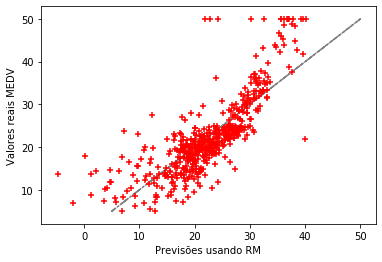

EMC: 30.51246877729947
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          7.01e-112
Time:                        16:22:41   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.

In [9]:
X = df[["RM","LSTAT"]]
X = sm.add_constant(X)

y = targets[["MEDV"]]

# Notar a diferença na ordem de X e y neste caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

#### Exercício 3: Com todas as variáveis como preditoras.

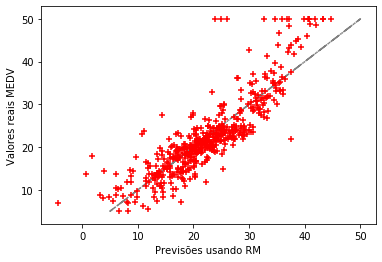

EMC: 21.894831181729202
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        16:22:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5

In [10]:
X = df[list(df.columns.values)]
X = sm.add_constant(X)

y = targets[["MEDV"]]

# Notar a diferença na ordem de X e y neste caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())